In [1]:
import pandas as pd

##### Step 1: Cleaning the data by filling the null values and correcting the data types

In [2]:
from common_codes.utils import Utils
df = pd.read_csv(Utils.get_file_path('sample_data.csv'))
df.head(2)

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13,2016-01-25,NaN


In [111]:
## Check null values in the DF

df.isnull().sum()

customer_id                  0
disbursed_amount            17
interest                    19
market                       0
employment                 611
time_employed              529
householder                  0
income                       0
date_issued                  0
target                       0
loan_purpose                 0
number_open_accounts         0
date_last_payment            0
number_credit_lines_12    9762
dtype: int64

In [112]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

In [113]:
df.columns

Index(['customer_id', 'disbursed_amount', 'interest', 'market', 'employment',
       'time_employed', 'householder', 'income', 'date_issued', 'target',
       'loan_purpose', 'number_open_accounts', 'date_last_payment',
       'number_credit_lines_12'],
      dtype='object')

In [114]:
## Fill the null value of interest with inputer
df['interest'] = imputer.fit_transform(df[['interest']])

df.isnull().sum()

customer_id                  0
disbursed_amount            17
interest                     0
market                       0
employment                 611
time_employed              529
householder                  0
income                       0
date_issued                  0
target                       0
loan_purpose                 0
number_open_accounts         0
date_last_payment            0
number_credit_lines_12    9762
dtype: int64

In [115]:
df['disbursed_amount'] = imputer.fit_transform(df[['disbursed_amount']])

df.isnull().sum()

customer_id                  0
disbursed_amount             0
interest                     0
market                       0
employment                 611
time_employed              529
householder                  0
income                       0
date_issued                  0
target                       0
loan_purpose                 0
number_open_accounts         0
date_last_payment            0
number_credit_lines_12    9762
dtype: int64

In [116]:
try:
    df = df.drop(columns=['number_credit_lines_12','customer_id'])
except KeyError as ke:
    print(ke)
except Exception as ex:
    print(ex)



In [117]:

df.isnull().sum()

disbursed_amount          0
interest                  0
market                    0
employment              611
time_employed           529
householder               0
income                    0
date_issued               0
target                    0
loan_purpose              0
number_open_accounts      0
date_last_payment         0
dtype: int64

In [118]:
# Filling the empty string values with others

df['employment'] = df['employment'].fillna('Other')
df['time_employed'] = df['time_employed'].fillna('Other')

In [119]:
## Change the date into datetime datatype

df['date_issued'] = pd.to_datetime(df['date_issued'])

df['date_last_payment'] = pd.to_datetime(df['date_last_payment'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   disbursed_amount      10000 non-null  float64       
 1   interest              10000 non-null  float64       
 2   market                10000 non-null  object        
 3   employment            10000 non-null  object        
 4   time_employed         10000 non-null  object        
 5   householder           10000 non-null  object        
 6   income                10000 non-null  float64       
 7   date_issued           10000 non-null  datetime64[ns]
 8   target                10000 non-null  int64         
 9   loan_purpose          10000 non-null  object        
 10  number_open_accounts  10000 non-null  int64         
 11  date_last_payment     10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 937.6+ 

In [120]:
try:
    df = df.drop(columns=['date_issued','date_last_payment'])
except KeyError as ex:
    print(ex)

##### Step 2 : Exploratory Data Analysis

In [121]:
import plotly.express as px

In [122]:
px.histogram(df, x='interest')
## Majority of interest range is between 10 to 14

In [123]:
px.histogram(df,x ='disbursed_amount')

## Majority of the amount range is in 5k to 15K

In [124]:
px.histogram(df, x='income', range_x=[0,200000])

In [125]:
px.histogram(df, x='number_open_accounts')

<Axes: xlabel='market'>

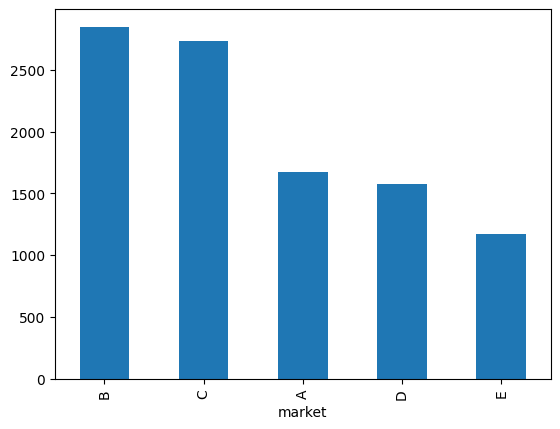

In [126]:
df['market'].value_counts().plot.bar()

## Market B and C are more

<Axes: xlabel='employment'>

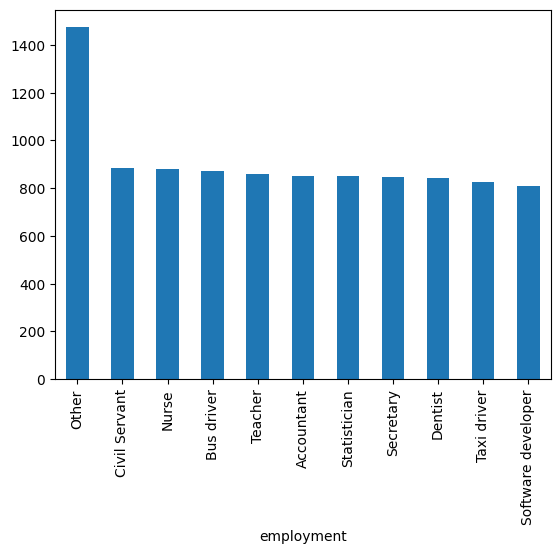

In [127]:
df['employment'].value_counts().plot.bar()
## All employment has equal customers

<Axes: xlabel='householder'>

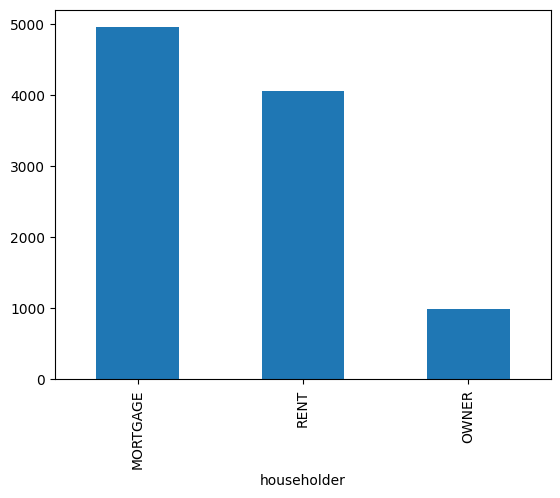

In [128]:
df['householder'].value_counts().plot.bar()
## Majority of householder is mortgage

<Axes: xlabel='loan_purpose'>

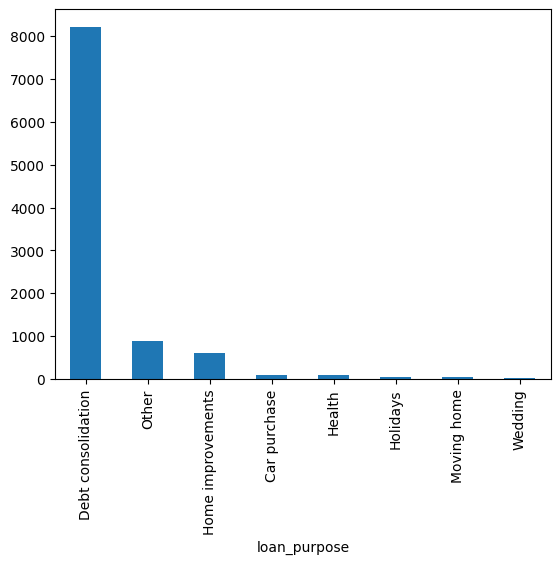

In [129]:
df['loan_purpose'].value_counts().plot.bar()
## Majority of customers have taken loan for debt consolidation

<Axes: xlabel='time_employed'>

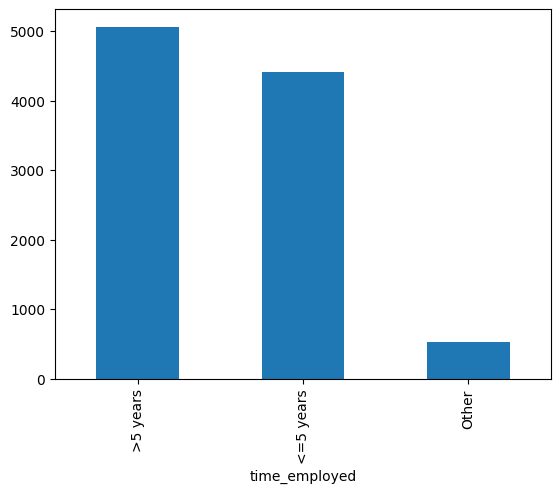

In [130]:
df['time_employed'].value_counts().plot.bar()
## Majority of employees are more than 5 years

#### Step 3: Scaling the varaibles and bring it down between 0 to 1, so that we can feed to the algorithm and it make proper decision to provide appropriate weightage

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [132]:
# Fit and transform all columns at once
df[['interest', 'disbursed_amount', 'income']] = scaler.fit_transform(df[['interest', 'disbursed_amount', 'income']])

df.head(2)

,disbursed_amount,interest,market,employment,time_employed,householder,income,target,loan_purpose,number_open_accounts
0,0.653901,0.461951,C,Teacher,<=5 years,RENT,0.038719,0,Debt consolidation,4
1,0.191112,0.276143,B,Accountant,<=5 years,OWNER,0.046682,0,Car purchase,13


##### Step 3:Changing the text data into the numeric for the algorithm to process

In [133]:
## Converting market into the numberic values
'''
dfm = pd.get_dummies(df['market']).astype(int)
df = pd.concat([df,dfm],axis=1)
df = df.drop(columns=['market'])
df.head(5)
'''


"\ndfm = pd.get_dummies(df['market']).astype(int)\ndf = pd.concat([df,dfm],axis=1)\ndf = df.drop(columns=['market'])\ndf.head(5)\n"

In [134]:
## Converting loan_purpose into the numberic values
'''
dfm = pd.get_dummies(df['loan_purpose']).astype(int)
df = pd.concat([df,dfm],axis=1)
df = df.drop(columns=['loan_purpose'])
df.head(5)
'''

"\ndfm = pd.get_dummies(df['loan_purpose']).astype(int)\ndf = pd.concat([df,dfm],axis=1)\ndf = df.drop(columns=['loan_purpose'])\ndf.head(5)\n"

In [135]:
## Converting householder into the numberic values

'''
dfm = pd.get_dummies(df['householder']).astype(int)
df = pd.concat([df,dfm],axis=1)
df = df.drop(columns=['householder'])
df.head(5)
'''

"\ndfm = pd.get_dummies(df['householder']).astype(int)\ndf = pd.concat([df,dfm],axis=1)\ndf = df.drop(columns=['householder'])\ndf.head(5)\n"

In [136]:
## Converting employment into the numberic values

'''
dfm = pd.get_dummies(df['employment']).astype(int)
df = pd.concat([df,dfm],axis=1)
df = df.drop(columns=['employment'])
df.head(5)
'''

"\ndfm = pd.get_dummies(df['employment']).astype(int)\ndf = pd.concat([df,dfm],axis=1)\ndf = df.drop(columns=['employment'])\ndf.head(5)\n"

In [137]:
## Converting all text columns into the numberic values

columns = ['employment','householder','loan_purpose','market','time_employed']
for column in columns:
    dfm = pd.get_dummies(df[column]).astype(int)
    df = pd.concat([df,dfm],axis=1)
    df = df.drop(columns=[column])
    print(f"{column} has been processed succesfully into numeric type and dropped from the df")

df.head(5)

employment has been processed succesfully into numeric type and dropped from the df
householder has been processed succesfully into numeric type and dropped from the df
loan_purpose has been processed succesfully into numeric type and dropped from the df
market has been processed succesfully into numeric type and dropped from the df
time_employed has been processed succesfully into numeric type and dropped from the df


,disbursed_amount,interest,income,target,number_open_accounts,Accountant,Bus driver,Civil Servant,Dentist,Nurse,...,Other,Wedding,A,B,C,D,E,<=5 years,>5 years,Other
0,0.653901,0.461951,0.038719,0,4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.191112,0.276143,0.046682,0,13,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.300381,0.159244,0.031963,0,8,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.196245,0.044464,0.045943,0,20,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.910824,0.603243,0.043497,0,14,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


##### Step 4: Prediction with modelling

In [138]:
## Droping target column as we need all the features only
X = df.drop(columns=['target']) ## this equivalent to the standard X that we do like X = df[[column1, column2...]]
y = df['target']

In [139]:
y.value_counts()

## Since the target has more zeros than ones, the model will predict 0 more often. This is called 'Degree of Bias'
## This imbalance data set. In order to solve this we over sample the data so that it won't affect the quality of the data.

target
0    9883
1     117
Name: count, dtype: int64

##### Degree Of Bias 
Since the target has more zeros than ones, the model will predict 0 more often. This is called 'Degree of Bias'

This imbalance data set. In order to solve this we over sample the data so that it won't affect the quality of the data.

In [140]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

In [141]:
y.value_counts()

target
0    9883
1    9883
Name: count, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [143]:
## Linear Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lrm = LogisticRegression()
lrm.fit(X_train, y_train)
lrm_y_pred = lrm.predict(X_test)

classi_report = classification_report(y_test, lrm_y_pred)
print(classi_report)


              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1963
           1       0.61      0.63      0.62      1991

    accuracy                           0.61      3954
   macro avg       0.61      0.61      0.61      3954
weighted avg       0.61      0.61      0.61      3954



/Users/murtuzasaifee/Documents/Personal/Courses/python_ml_nlp_practice_code/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [148]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

classi_report = classification_report(y_test, dtc_y_pred)
print(classi_report)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1963
           1       0.98      1.00      0.99      1991

    accuracy                           0.99      3954
   macro avg       0.99      0.99      0.99      3954
weighted avg       0.99      0.99      0.99      3954



In [146]:
## Random Forset

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

classi_report = classification_report(y_test, rfc_y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1963
           1       1.00      1.00      1.00      1991

    accuracy                           1.00      3954
   macro avg       1.00      1.00      1.00      3954
weighted avg       1.00      1.00      1.00      3954



In [151]:
## KNN - 2 Neigbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

classi_report = classification_report(y_test, knn_y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1963
           1       0.98      1.00      0.99      1991

    accuracy                           0.99      3954
   macro avg       0.99      0.99      0.99      3954
weighted avg       0.99      0.99      0.99      3954

